# Oppgave a, 1 og 2 er nederst i filen

Eigenvalues of Hessian Matrix:[0.31562553 4.00023646]
[[3.62573224]
 [3.40309271]]
(2, 1) (100, 2) (100, 1)
[[3.62573224]
 [3.40309271]]


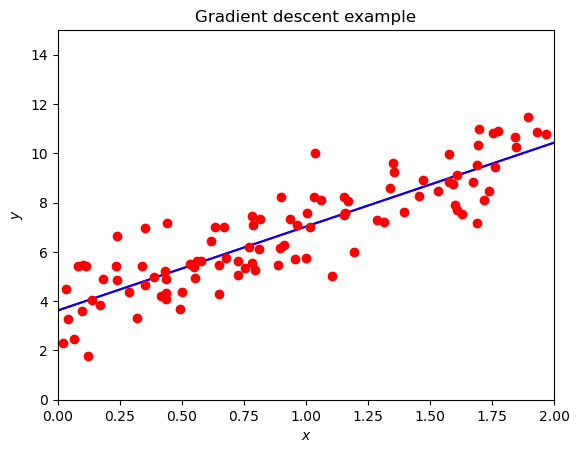

In [1]:
# Importing various packages
from random import random, seed
import autograd.numpy as np
from autograd import grad
# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 1000

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta-y)
    beta -= eta*gradient
print(np.shape(gradient), np.shape(X), np.shape(y))
print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

In [28]:
seed = np.random.seed(12345)

n = 100
x = np.random.rand(n,1)

def create_X(x):
    return np.c_[np.ones((n, 1)), x, x**2]

def create_data(x):
    return 1 + 3*x + 5*x**2 #+ np.random.randn(n, 1)

def cost_func(beta):
    return (1.0/n)*np.sum((y - X @ beta)**2)

y = create_data(x)

X = create_X(x)

beta = np.random.rand(3, 1)

def g(X, beta, y):
    return 2*X.T @ (X @ beta - y)

n_iter = 1000

#learning rate
eta = 0.001

#print(np.shape(X), np.shape(beta), np.shape(y))
for i in range(n_iter):
    beta -= eta*g(X, beta, y)
    
print(beta)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_linreg)

[[0.90320564]
 [3.49897584]
 [4.53447395]]
[[1.]
 [3.]
 [5.]]


In [3]:
def gradient_decent(X, y, beta, eta, derivative, n_iter, momentum=0):
    change = 0
    for i in range(n_iter):
        new_change = eta*derivative(beta) + momentum*change
        beta -= new_change
        change = new_change
        
    return beta

In [9]:
g_grad = egrad(cost_func)
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

eta = 1.0/np.max(EigValues)
n_iter = 1000
beta = np.random.rand(3, 1)
beta = gradient_decent(X, y, beta, eta, g_grad, n_iter, momentum=0.9)
print(beta)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_linreg)

Eigenvalues of Hessian Matrix:[2.83705967 0.21664226 0.00512639]
[[1.]
 [3.]
 [5.]]
[[1.]
 [3.]
 [5.]]


In [5]:

beta = np.random.rand(3, 1)
for i in range(n_iter):
    beta -= eta*g_grad(beta)
print(beta)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_linreg)

[[1.03369228]
 [3.8010027 ]
 [3.82994224]]
[[1.]
 [3.]
 [5.]]


>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


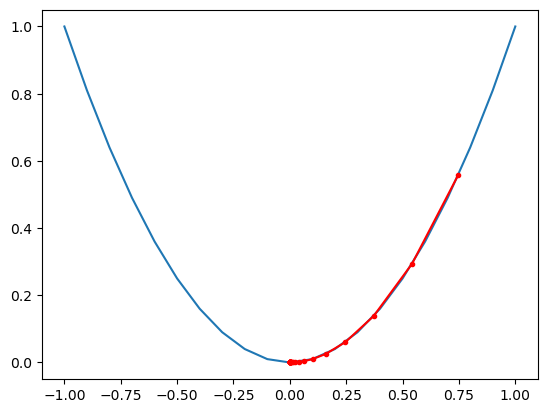

In [6]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


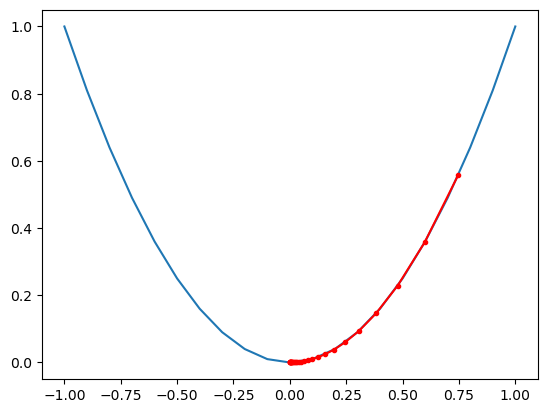

In [7]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

In [8]:
x = np.random.rand(n,1)
y = create_data(x)

X = create_X(x)
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(3,1)
eta = 1.0/np.max(EigValues)
Niterations = 100

# define the gradient
training_gradient = grad(cost_func)

for iter in range(Niterations*10):
    gradients = training_gradient(theta)
    theta -= eta*gradients
    #print(iter,gradients[0],gradients[1])
print("theta from own gd")
print(theta)

theta = np.random.randn(3,1)
# Now improve with momentum gradient descent
change = 0.0
delta_momentum = 0.9
for iter in range(Niterations*10):
    # calculate gradient
    gradients = training_gradient(theta)
    # calculate update
    new_change = eta*gradients+delta_momentum*change
    # take a step
    theta -= new_change
    # save the change
    change = new_change
    #print(iter,gradients[0],gradients[1])
print("theta from own gd wth momentum")
print(theta)

Own inversion
[[1.]
 [3.]
 [5.]]
Eigenvalues of Hessian Matrix:[2.83705967 0.21664226 0.00512639]
theta from own gd
[[0.98056432]
 [3.10074066]
 [4.9040234 ]]
theta from own gd wth momentum
[[1.]
 [3.]
 [5.]]


In [10]:
from random import random, seed
import autograd.numpy as np
from autograd import grad
# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

In [11]:
def create_X(x):
    return np.c_[np.ones((n, 1)), x, x**2]

def create_data(x):
    return 1 + 3*x + 5*x**2 #+ np.random.randn(n, 1)

def cost_func(beta):
    return (1.0/n)*np.sum((y - X @ beta)**2)

In [19]:
seed = np.random.seed(12345)

n = 100
x = np.random.rand(n,1)
y = create_data(x)

X = create_X(x)

beta = np.random.rand(3, 1)

In [20]:
def gradient_decent(X, y, beta, eta, derivative, n_iter, momentum=0):
    change = 0
    for i in range(n_iter):
        new_change = eta*derivative(beta) + momentum*change
        beta -= new_change
        change = new_change
        
    return beta

g_grad = egrad(cost_func)

### Uten momentum

In [31]:
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

eta = 1.0/np.max(EigValues)
print(eta)
#eta = 0.001
n_iter = 1000
beta = np.random.rand(3, 1)
beta = gradient_decent(X, y, beta, eta, g_grad, n_iter)
print(beta)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_linreg)

Eigenvalues of Hessian Matrix:[2.83705967 0.21664226 0.00512639]
0.35247760575951176
[[0.95764792]
 [3.21832538]
 [4.79631047]]
[[1.]
 [3.]
 [5.]]


### Med momentum

In [22]:
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

eta = 1.0/np.max(EigValues)
n_iter = 1000
beta = np.random.rand(3, 1)
beta = gradient_decent(X, y, beta, eta, g_grad, n_iter, momentum=0.9)
print(beta)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_linreg)

Eigenvalues of Hessian Matrix:[2.83705967 0.21664226 0.00512639]
[[1.]
 [3.]
 [5.]]
[[1.]
 [3.]
 [5.]]
